In [88]:
# 필요 패키지 import
import pandas as pd
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [89]:
# 인구 10만명당 치료받은 수(2019) 보건복지부, 건강보험심사평가원,「국가정신건강현황」
# 인구수는 통계청 장래인구추계의 중위 추계 활용. 낮병동 이용자 제외.
# 만 15세 이상의 인구 중 각 진단에 대하여 1회 이상 치료받은 실인원임.
# 정신의료기관 소재지 기준으로 분석하였음.
# https://kosis.kr/statHtml/statHtml.do?orgId=117&tblId=DT_920023_A005&conn_path=I3


mental_status =pd.read_excel('mental_status_pop.xlsx',
                    sheet_name=0,
                     usecols=[1, 8],
                    names= ['시도별','진단수전체'],
                    skiprows= 6
                     )


C:\Users\ksj14\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:221: UserWarning:

Workbook contains no default style, apply openpyxl's default



In [91]:
# 데이터 확인
mental_status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   시도별     17 non-null     object
 1   진단수전체   17 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 400.0+ bytes


In [59]:
# 데이터 시도별 이름 변경
name_list=[]
for name in mental_status['시도별'] :
    name_list.append(name[0:2])
       
name_list[10:16]=['충북','충남','전북','전남','경북','경남']
mental_status['시도별']=name_list

In [60]:
mental_status

,시도별,진단수전체
0,서울,188210
1,부산,68266
2,대구,43523
3,인천,47309
4,광주,22362
5,대전,28643
6,울산,13310
7,세종,4789
8,경기,163237
9,강원,24365


In [61]:
# 연령 비율 적용
changed_pop=[]
a=0
for num in mental_status['진단수전체']:
    changed_pop.append(num *0.4402)
    a=+1

    if a==7:
         changed_pop.append(num *0.4609) ## 세종시 예외 적용
    
## 세종시 예외 적용
# changed_pop[7]=mental_status['진단수(명)'][7]*0.4609

mental_status['진단수전체']= changed_pop

In [62]:
mental_status
# 2207.2501

,시도별,진단수전체
0,서울,82850.0420
1,부산,30050.6932
2,대구,19158.8246
3,인천,20825.4218
4,광주,9843.7524
5,대전,12608.6486
6,울산,5859.0620
7,세종,2108.1178
8,경기,71856.9274
9,강원,10725.4730


# 지역별 진료수 정규화

## (주요우울장애 소계 * 연령대별 우울증 비율 )/(지역별 인구수)*10^5


In [92]:
pop_status =pd.read_excel('2019_pop.xlsx',
                    usecols=[0, 2],
                    names= ['시도별','인구수'],
                    skiprows= 1
                     )
pop_status['시도별']= name_list
pop_status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   시도별     17 non-null     object
 1   인구수     17 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 400.0+ bytes


In [64]:
mental_status['진단수(명)']=round((mental_status['진단수전체']/pop_status['인구수'])*(10**5),1)
mental_status

,시도별,진단수전체,진단수(명)
0,서울,82850.0420,1796.8
1,부산,30050.6932,1955.7
2,대구,19158.8246,1699.0
3,인천,20825.4218,1458.6
4,광주,9843.7524,1467.5
5,대전,12608.6486,1835.8
6,울산,5859.0620,1042.8
7,세종,2108.1178,1251.7
8,경기,71856.9274,1120.2
9,강원,10725.4730,1601.9


In [84]:
final_mental=mental_status.drop(['진단수전체'], axis=1)
f=final_mental.sort_values(by='진단수(명)', ascending=False).reset_index().drop(['index'], axis=1)
f.index=f.index+1
f

,시도별,진단수(명)
1,부산,1955.7
2,대전,1835.8
3,서울,1796.8
4,제주,1711.9
5,대구,1699.0
6,충북,1619.5
7,강원,1601.9
8,전북,1502.5
9,광주,1467.5
10,인천,1458.6


In [66]:
# 데이터 저장
final_mental.to_csv('data/final_mental_pop.csv', encoding='utf-8')

# Bar Plot

In [67]:
## 그래프 도출
## 필요한 라이브러리 import
import matplotlib
import matplotlib.pyplot as plt
import platform 

# 플랫폼 확인 # Window 
if platform.system() == 'Windows': 
    matplotlib.rc('font', family='Malgun Gothic') 
elif platform.system() == 'Darwin':
    # Mac 
    matplotlib.rc('font', family='AppleGothic') 
else: #linux 
    matplotlib.rc('font', family='NanumGothic') 
    # 그래프에 마이너스 표시가 되도록 변경 
matplotlib.rcParams['axes.unicode_minus'] = False


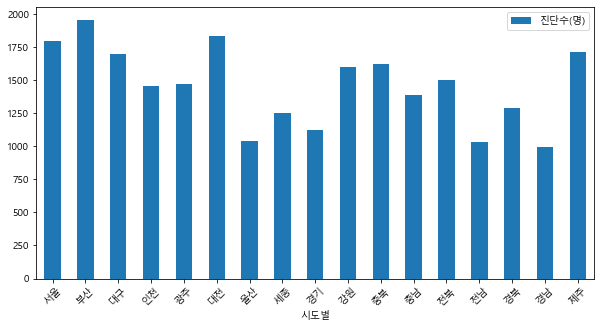

In [68]:
df=pd.read_csv('data/final_mental_pop.csv', encoding='utf-8',index_col=0)
ax = df.plot.bar(x='시도별', y='진단수(명)', rot=45,figsize=(10,5))

## 정렬된 그래프

Text(0.5, 1.0, '2019 시도별 주요우울장애 진단수')

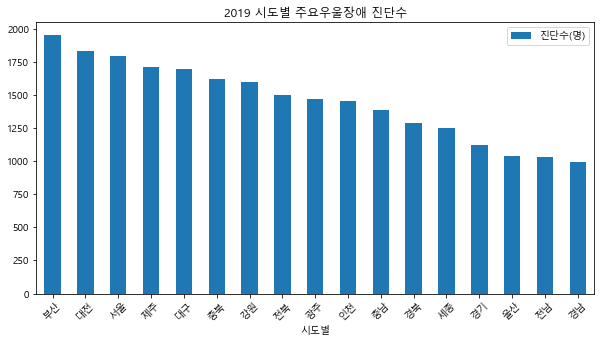

In [69]:
arranged=df.sort_values(by=['진단수(명)'], ascending=False)
arranged_ax =arranged.plot.bar(x='시도별', y='진단수(명)', rot=45,figsize=(10,5))
plt.title('2019 시도별 주요우울장애 진단수')

## 그래프 저장
plt.savefig('data/우울장애_인구_바그래프.png')

# 이쁜 그래프

In [70]:
import pandas as pd
import cufflinks as cf
cf.go_offline(connected=True)

In [93]:
df=pd.read_csv('data/final_mental_pop.csv', encoding='utf-8',index_col=0)

mental_bar=f.iplot(kind='bar',theme='white',
    x='시도별',
    xTitle='시도별',   
   yTitle='진료수(명)', 
    title='2019 시도별 우울장애 10만명당 진료수')

